# Hypothesis Testing 

A **hypothesis test** evaluates two statements about a population. The statements are mutually exclusive. The test concludes which statement best reflects the sample data. A hypothesis test helps us determine the **statistical significance** of a finding.

## There is two types of hypothesis
- **Null Hypothesis:** Null hypothesis is a statistical theory that suggests there is no statistical significance exists between the populations. 
    - It is denoted by H0.
    
- **Alternative Hypothesis:** An Alternative hypothesis suggests there is a significant difference between the population parameters. It could be greater or smaller. Basically, it is the contrast of the Null Hypothesis.
    - It is denoted by H1.
    
## How to reject/accept Null Hypothesis?
- By **Level of significance**

Level of significance: Denoted by alpha or α. It is a fixed probability of wrongly rejecting a True Null Hypothesis. For example, if α=5%, that means we are okay to take a 5% risk and conclude there exists a difference when there is no actual difference.

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("./Dataset/drug_trial.csv")
df.head()

,group,mean_duration
0,Control,7
1,Control,5
2,Control,4
3,Control,5
4,Control,8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   group          80 non-null     object
 1   mean_duration  80 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


-------------------------------------------------------------
**There are Experimental and Control to test the hypothesis**

In [18]:
df['group'].unique()

array(['Control', 'Experimental'], dtype=object)

-------------------------------------------------------------
**Distribution of the mean_duration**

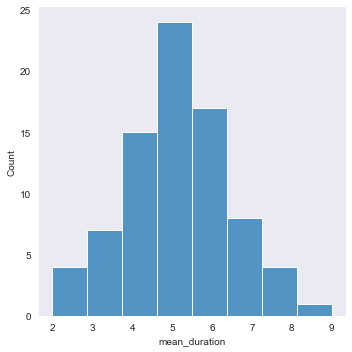

In [15]:
sns.set_style("dark")
sns.displot(df, x="mean_duration")
plt.show()

In [27]:
df.groupby(["group"]).mean()

,mean_duration
group,
Control,5.4
Experimental,4.8


In [34]:
print("Mean difference is: ",round(5.4-4.8, 2))

Mean difference is:  0.6


**So, the Control and Experimental group has significant mean difference. But can we reject the null hypothesis?**

**NO!**

# Let's run 10,000 Permutations 

In [36]:
control_mean =  df[df['group'] == 'Control'].mean()
experiment_mean = df[df['group'] == 'Experimental'].mean()

In [38]:
data_points = list(df['mean_duration'])
mean_differences = []
number_of_iterations = 10000

for i in range(number_of_iterations):
    group_1 = []
    group_2 = []
    for data_point in data_points:
        random_assignment = np.random.randint(0,2)==True
        if random_assignment:
            group_1.append(data_point)
        else:
            group_2.append(data_point)

    trial_mean_difference = np.mean(group_2) - np.mean(group_1)
    mean_differences.append(trial_mean_difference)
    
print("Mean Differences Mean is: " + str(np.array(mean_differences).mean()))

Mean Differences Mean is: 0.00013959445062162876


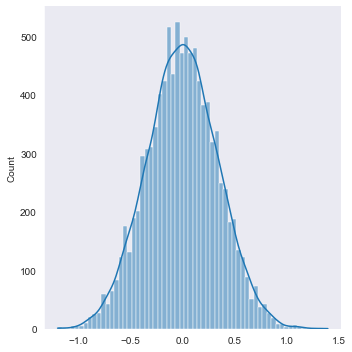

In [42]:
sns.displot(mean_differences, kde=True)
plt.show()

**So, center of this plot, which is Mean Differences Mean = 0.00013959445062162876.**

**Our Mean difference is:  0.6. So the mean difference is random and there is no real difference.**

## How many values exceed the mean difference of 0.6?

In [43]:
mean_differences = pd.DataFrame(mean_differences)

exceeds_mean_diff = len(mean_differences[mean_differences[0] >= 0.6])
print(exceeds_mean_diff)

395


In [44]:
p_value = exceeds_mean_diff / number_of_iterations
print(p_value)

0.0395


# So, P value is less than 0.05. It means we can reject the null hypothesis.
## Our flu medicine works.